# HR Analytics: Job Change of Data Scientists
Predict who will move to a new job

# Business Understanding

# Problem Statement

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which was conducted by the company. Many people signup for their training. Company wants to know which of these candidates really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates.

Using the demographics, education, relevant experience data, predict the probability of a candidate to look for a new job or will work for the company using machine learning techniques, as well as interpreting affected factors on employee decision.

# Importing Libraries

In [1]:
# importing packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import plot_tree

# Data Preprocessing 

# Importing Dataset

In [2]:
# importing dataframe
df = pd.read_csv('C:/Users/Ramya/Desktop/internship/aug_train.csv')

In [3]:
# first five rows of dataframe
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
# last five rows of dataframe
df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [5]:
# information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
# description of the data in dataframe
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [7]:
# datatype of each column
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [8]:
# size of the dataframe
df.shape

(19158, 14)

# Finding Missing data

In [9]:
# number of missing values in the dataframe
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

# Removing missing data

In [10]:
# removing missing values
df=df.dropna()

In [11]:
# checking if still missing values are present
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

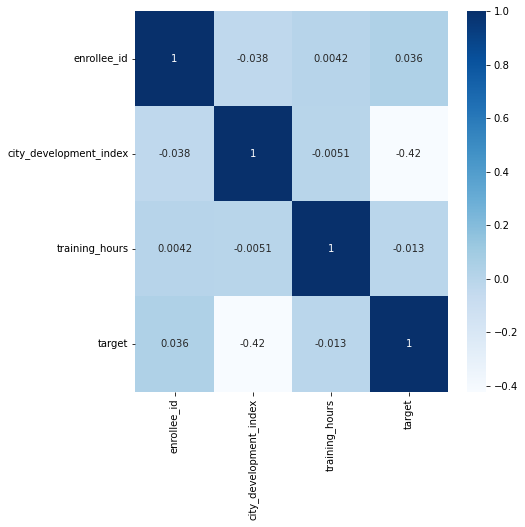

In [12]:
# 2D Correlation heatmap matrix
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

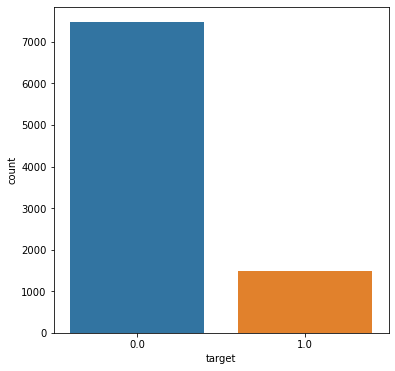

In [13]:
# to show count of values in target column using countplot
plt.figure(figsize=(6,6))
sns.countplot(x='target',data=df)
plt.show()

In [14]:
# showing categorical columns
categorical_cols=['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_type']

C:\Users\Ramya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ramya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ramya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ramya\anaconda3\lib\si

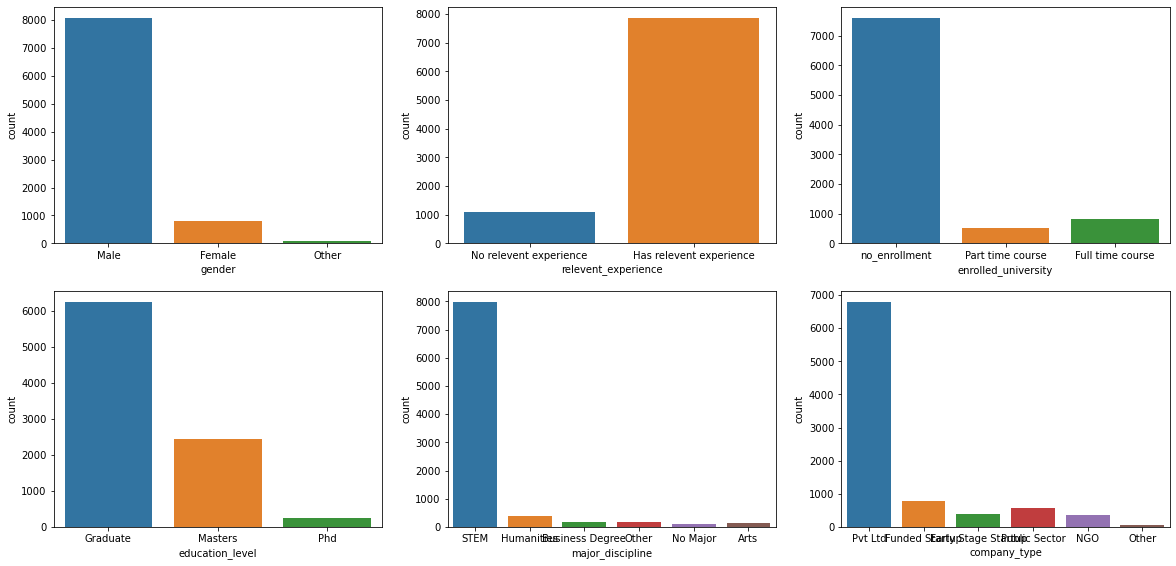

In [15]:
# showing categorical values using countplot
plt.figure(figsize=(20,20))

for i,feature in enumerate(categorical_cols):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

# Most of the data scientists in the sample:

Are male
Have relevant experience
Are not currently enrolled in a university course
Are graduate in a STEM discipline
Have more than 20 years of work experience
Work in a private company
Work in a medium sized company
Got their new job in the last year

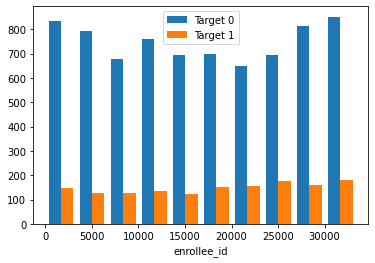

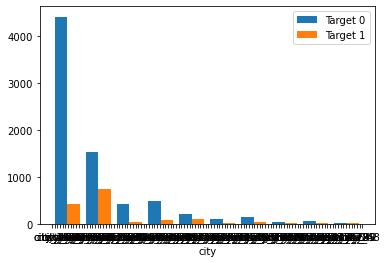

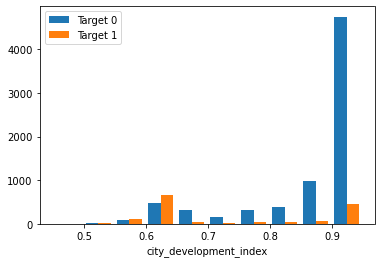

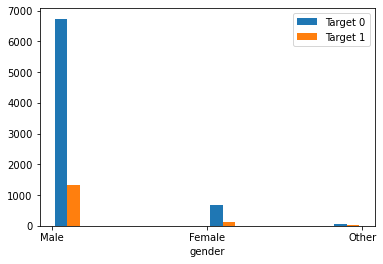

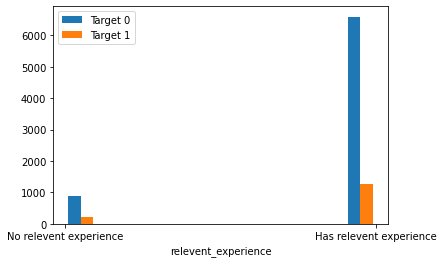

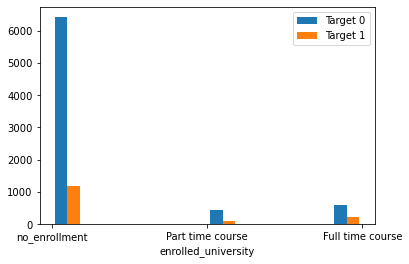

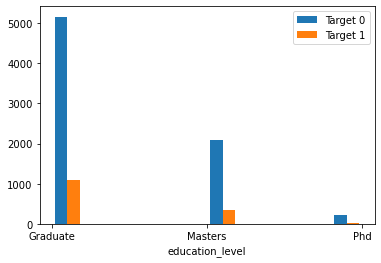

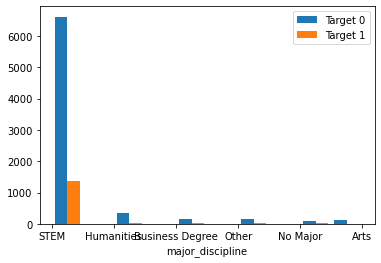

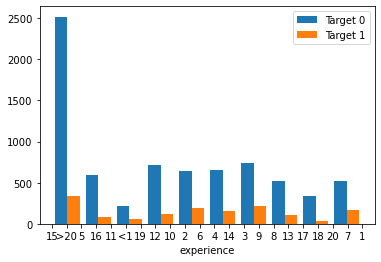

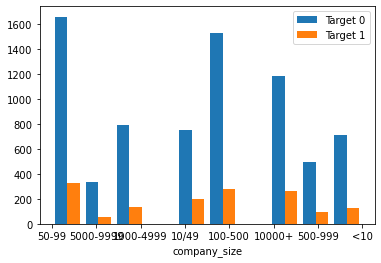

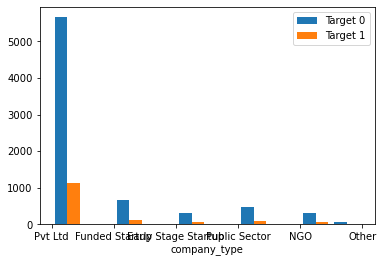

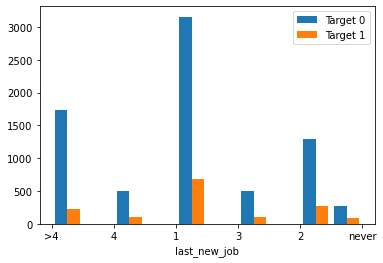

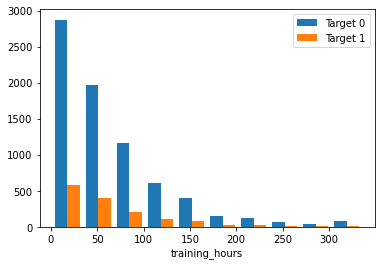

In [16]:
# showing all the columns with related to target column using hist plot
hists = {}
for item in df.columns:  
    if item == 'target': continue
    hists[item] = plt.hist([df[df['target']==0][item],\
              df[df['target']==1][item]], label=['Target 0', 'Target 1'])
    plt.xlabel(item)
    plt.legend()
    plt.show()
    

In [17]:
# dropping columns for not having much important data
df=df.drop(['city','company_size','enrollee_id','experience','last_new_job'],axis=1)

# Label Encoding

In [18]:
# converting the categorical values to numeric form using label encoder
categorical_cols=['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_type']
le=LabelEncoder()
df[categorical_cols]=df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [19]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,training_hours,target
1,0.776,1,1,2,0,5,5,47,0.0
4,0.767,1,0,2,1,5,1,8,0.0
7,0.762,1,0,2,0,5,5,18,1.0
8,0.920,1,0,2,0,5,5,46,1.0
11,0.920,1,0,2,0,5,5,108,0.0


# Defining X and Y has indepenent and dependent columns

In [20]:
# seperating independent columns and dependent column
X = df.drop('target',axis=1)
Y = df['target']

# Chi Square test

In [21]:
# applying chi square to select features with the highest values relative to the target
chi_scores = chi2(X,Y)

In [22]:
# displaying chi2 values of all the features relative to the target
chi_scores

(array([2.54948962e+01, 1.33010584e-03, 1.05782413e+01, 1.53908158e+01,
        1.02438139e+01, 5.32591209e+00, 8.61132400e-02, 8.01908330e+01]),
 array([4.43554728e-07, 9.70907108e-01, 1.14426462e-03, 8.74121184e-05,
        1.37143740e-03, 2.10106095e-02, 7.69177773e-01, 3.39940631e-19]))

the above array shows chi2 values of features
the below array shows p values of features

In [23]:
# to show p values with related to chi values 
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

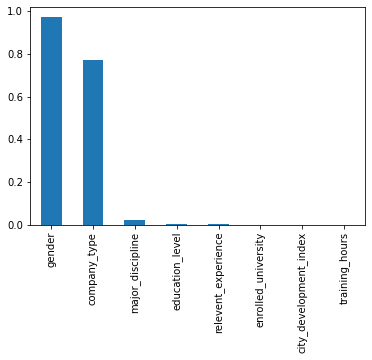

In [24]:
# showing p values for features in plot bar
p_values.plot.bar()

as gender and company_type columns are having highest p values cannot be used for model building

In [25]:
# dropping gender and company type columns as they are having highest p values
df=df.drop(['gender','company_type'],axis=1)

In [26]:
df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,training_hours,target
1,0.776,1,2,0,5,47,0.0
4,0.767,0,2,1,5,8,0.0
7,0.762,0,2,0,5,18,1.0
8,0.920,0,2,0,5,46,1.0
11,0.920,0,2,0,5,108,0.0


In [27]:
# printing size of independent columns and dependent column
print(X.shape, Y.shape)

(8955, 8) (8955,)


# Splitting dataset into trining and test set

In [28]:
# splitting X and Y in the ratio of 80/20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
# X_train size
X_train.shape

(7164, 8)

In [30]:
# Y_train size
Y_train.shape

(7164,)

In [31]:
# X_test size
X_test.shape

(1791, 8)

In [32]:
# Y_test size
Y_test.shape

(1791,)

# Building a model

In [33]:
# applying decision tree classifier to predict
DTC = DecisionTreeClassifier(max_depth=25,criterion='entropy',max_features=8)
DTC.fit(X_train,Y_train)
Y_test_pred = DTC.predict(X_test)
accuracy_score(Y_test, Y_test_pred)

0.7889447236180904

# HyperParameters tuning

In [35]:
# hyperparameter tuning to find best hyperparameters values
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(DTC, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_test, Y_test)

print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [36]:
# applying decision tree with the best hyperparameters values
model = DecisionTreeClassifier(max_depth= 5, min_samples_leaf=1,min_samples_split=10)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [37]:
# appyling model to predict 
Y_test_pred = model.predict(X_test)
print()
print("Accuracy of the model:", metrics.accuracy_score(Y_test,Y_test_pred))


Accuracy of the model: 0.8570630932439978


# Confusion Matrix

In [38]:
# showing confusion matrix
c_matrix=metrics.confusion_matrix(Y_test,Y_test_pred)
print(c_matrix)

[[1403  108]
 [ 148  132]]


Text(0.5, 257.44, 'Predicted label')

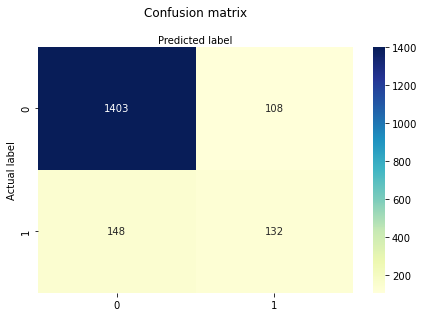

In [39]:
# visualizing Confusion Mtrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification Report

In [40]:
# displaying classification report for the prediction
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      1511
         1.0       0.55      0.47      0.51       280

    accuracy                           0.86      1791
   macro avg       0.73      0.70      0.71      1791
weighted avg       0.85      0.86      0.85      1791



# Implementing ROC curve

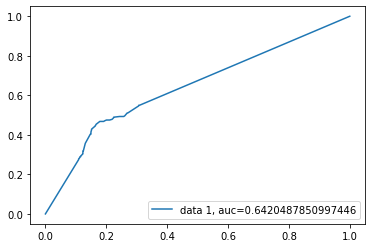

In [41]:
# ROC curve
Y_pred_proba = DTC.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Conclusion


Based on the columns of 'city_development_index', 'relevant_experience','enrolled_university','education_level','major_discipline','training_hours' we could predict that whether a person will join the company after training given by the company. 

We observed that Decision tree produces the best result as it splits a population of dataset into smaller segments.